### 텐서플로 설치
1. 윈도우 시작메뉴 > Anaconda > Anaconda Prompt 실행
2. pip install tensorflow

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.13.0'

In [3]:
from tensorflow import keras

### 신경망 설계

In [4]:
model = keras.models.Sequential()

In [8]:
model.add(keras.layers.Dense(7, activation='sigmoid', input_shape=(5,)))

In [9]:
model.add(keras.layers.Dense(4))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 42        
                                                                 
 dense_3 (Dense)             (None, 4)                 32        
                                                                 
Total params: 74 (296.00 Byte)
Trainable params: 74 (296.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(7, activation='sigmoid', input_shape=(5,)))
model.add(keras.layers.Dense(7, activation='sigmoid'))
model.add(keras.layers.Dense(7, activation='sigmoid'))
model.add(keras.layers.Dense(7, activation='sigmoid'))
model.add(keras.layers.Dense(4))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 42        
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 7)                 56        
                                                                 
 dense_8 (Dense)             (None, 4)                 32        
                                                                 
Total params: 242 (968.00 Byte)
Trainable params: 242 (968.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 연습문제
> 입력속성이 3개, 중간층의 뉴런갯수가 차례로 4개, 5개, 6개이다.<br>
> 출력층은 값이 1개인 신경망을 케라스로 만들어보세요.

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(4, activation='relu', input_shape=(3,)))
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 4)                 16        
                                                                 
 dense_14 (Dense)            (None, 5)                 25        
                                                                 
 dense_15 (Dense)            (None, 6)                 36        
                                                                 
 dense_16 (Dense)            (None, 1)                 7         
                                                                 
Total params: 84 (336.00 Byte)
Trainable params: 84 (336.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.predict([[1., 2., 3.]]) # 입력 데이터는 2차원(표형태) 이어야 한다

1/1 [==============================] - 0s 292ms/step


array([[-0.22620688]], dtype=float32)

In [17]:
model.predict([[-1., -1., -1.]])

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)

In [19]:
model.predict([[100., 100., 100.]])

1/1 [==============================] - 0s 27ms/step


array([[-12.894052]], dtype=float32)

### 신경망으로 아이리스 회귀 적용
- 해결하려는 문제는 무엇인가?
> 아이리스의 세가지 속성을 이용하여, petal width 값을 예측하시오 (회귀 문제)

In [20]:
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()

In [22]:
X = iris.data[:, :3]
y = iris.data[:, 3] # petal width
X.shape, y.shape

((150, 3), (150,))

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(3, activation='relu', input_shape=(3,)))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 3)                 12        
                                                                 
 dense_18 (Dense)            (None, 4)                 16        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.get_weights() # 가중치와 절편의 초기값이 자동으로 할당되어 있다

[array([[ 0.00600433,  0.20701885, -0.5134542 ],
        [ 0.2961552 , -0.4030609 ,  0.20450425],
        [-0.42147994,  0.23945808, -0.67700005]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.3737086 ,  0.08794677, -0.42925802,  0.05055928],
        [ 0.635574  , -0.1930663 , -0.23769933, -0.34937376],
        [-0.7358472 ,  0.7632154 , -0.8744379 , -0.07723945]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.6656859 ],
        [-0.20515853],
        [ 0.9316678 ],
        [ 0.4272921 ]], dtype=float32),
 array([0.], dtype=float32)]

- 오차값 계산

In [26]:
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [29]:
y_hat = model.predict(X).ravel()
y_hat

5/5 [==============================] - 0s 748us/step


array([0.12038647, 0.1406235 , 0.10799684, 0.10100995, 0.12770794,
       0.11882688, 0.11215594, 0.10960925, 0.10385333, 0.13016196,
       0.1251516 , 0.09319928, 0.1309062 , 0.11371551, 0.18008257,
       0.17791699, 0.16136822, 0.12038647, 0.12918893, 0.13217007,
       0.14571142, 0.12469709, 0.16964322, 0.12867256, 0.09041499,
       0.14917539, 0.10647895, 0.11772929, 0.12601925, 0.10026571,
       0.12167335, 0.14329904, 0.1547405 , 0.17330332, 0.13016196,
       0.12931947, 0.1439094 , 0.12755641, 0.09666943, 0.11624909,
       0.13087028, 0.17349614, 0.1075423 , 0.10131931, 0.08962873,
       0.1309062 , 0.12153473, 0.09720999, 0.12500009, 0.11789921,
       0.5435852 , 0.47076973, 0.5721422 , 0.4947628 , 0.55787265,
       0.47767088, 0.46522027, 0.35423762, 0.54957825, 0.39014223,
       0.45147187, 0.4306882 , 0.55561006, 0.51591545, 0.36067715,
       0.50396806, 0.4348056 , 0.46295768, 0.6237842 , 0.45928392,
       0.4573695 , 0.46204966, 0.62190855, 0.5329687 , 0.50166

In [34]:
mse = ((y - y_hat)**2).sum()/len(y)
mse

0.9329700190602879

In [35]:
mse = ((y - y_hat)**2).mean()
mse

0.9329700190602879

- 케라스로 훈련하기

In [36]:
model.compile(loss='mse', optimizer='sgd')

In [37]:
model.fit(X, y, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4835
Epoch 2/100
5/5 [==============================] - 0s 997us/step - loss: 0.1447
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1227
Epoch 4/100
5/5 [==============================] - 0s 995us/step - loss: 0.1071
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0980
Epoch 6/100
5/5 [==============================] - 0s 997us/step - loss: 0.0922
Epoch 7/100
5/5 [==============================] - 0s 997us/step - loss: 0.0872
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0824
Epoch 9/100
5/5 [==============================] - 0s 997us/step - loss: 0.0792
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0761
Epoch 11/100
5/5 [==============================] - 0s 997us/step - loss: 0.0746
Epoch 12/100
5/5 [==============================] - 0s 997us/step - loss: 0.0714
Epoch 13/100
5/5 [=============================

In [38]:
h = model.history.history

Text(0, 0.5, 'error')

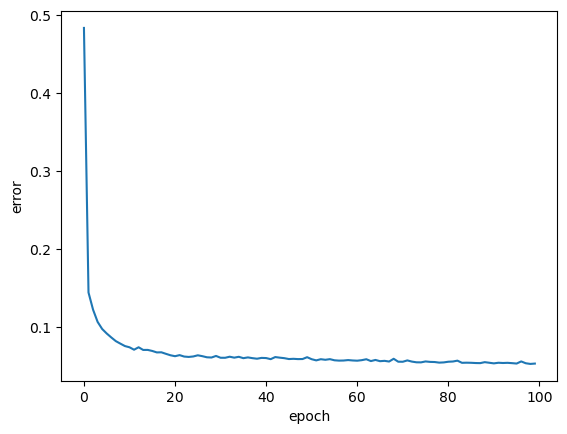

In [42]:
plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('error')

In [44]:
y_hat = model.predict(X).ravel()
y_hat

5/5 [==============================] - 0s 748us/step


array([0.26379988, 0.3041458 , 0.24210447, 0.29358885, 0.24480376,
       0.3145974 , 0.2359663 , 0.2912352 , 0.27631217, 0.31700376,
       0.28888154, 0.29967436, 0.29634082, 0.18516889, 0.21438064,
       0.23395824, 0.21840107, 0.26379988, 0.34920338, 0.2542755 ,
       0.37055314, 0.2654667 , 0.11461076, 0.36224037, 0.39032033,
       0.3745196 , 0.3152843 , 0.29565394, 0.282796  , 0.31425172,
       0.33756253, 0.32245502, 0.22850698, 0.2166816 , 0.31700376,
       0.2414703 , 0.2709706 , 0.23699883, 0.24107194, 0.29904014,
       0.2319459 , 0.3550625 , 0.21868965, 0.30409312, 0.3504718 ,
       0.29634082, 0.27832457, 0.25834858, 0.28107655, 0.27837723,
       1.6566672 , 1.5299617 , 1.7410421 , 1.4400934 , 1.6530448 ,
       1.5456429 , 1.5756613 , 1.109433  , 1.6425172 , 1.2993907 ,
       1.2694397 , 1.4138172 , 1.5034801 , 1.6353914 , 1.1851846 ,
       1.5388052 , 1.4981581 , 1.4260964 , 1.7057168 , 1.373305  ,
       1.5966829 , 1.396265  , 1.804208  , 1.654729  , 1.51412

In [45]:
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

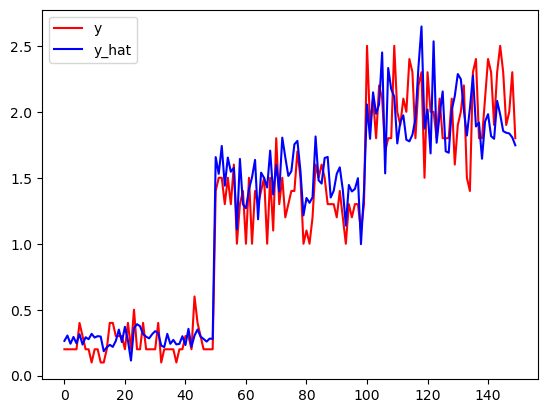

In [46]:
plt.plot(y, 'r-')
plt.plot(y_hat, 'b-')
plt.legend(['y', 'y_hat'])

### 아이리스 데이터를 신경망으로 분류해 보자
- 문제 : setosa 와 versicolor 두 품종을 분류하자 (속성은 모두 사용)

In [47]:
X = iris.data[:100]
y = iris.target[:100]
X.shape, y.shape

((100, 4), (100,))

In [48]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid')) # 0~1 사이의 확률값으로 출력되게 한다

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 10)                50        
                                                                 
 dense_30 (Dense)            (None, 10)                110       
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [66]:
model.fit(X, y, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 1.1906 - acc: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8206 - acc: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6480 - acc: 0.5400
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5602 - acc: 0.7900
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4858 - acc: 0.9000
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4246 - acc: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3804 - acc: 1.0000
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3469 - acc: 1.0000
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3229 - acc: 1.0000
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2881 - acc: 1.0000
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2636 

4/4 [==============================] - 0s 2ms/step - loss: 0.0170 - acc: 1.0000
Epoch 90/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0168 - acc: 1.0000
Epoch 91/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0165 - acc: 1.0000
Epoch 92/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0163 - acc: 1.0000
Epoch 93/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0160 - acc: 1.0000
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.0158 - acc: 1.0000
Epoch 95/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0156 - acc: 1.0000
Epoch 96/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0154 - acc: 1.0000
Epoch 97/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0152 - acc: 1.0000
Epoch 98/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0151 - acc: 1.0000
Epoch 99/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0148 - 

In [67]:
h = model.history.history # 학습이력

Text(0, 0.5, 'accuracy')

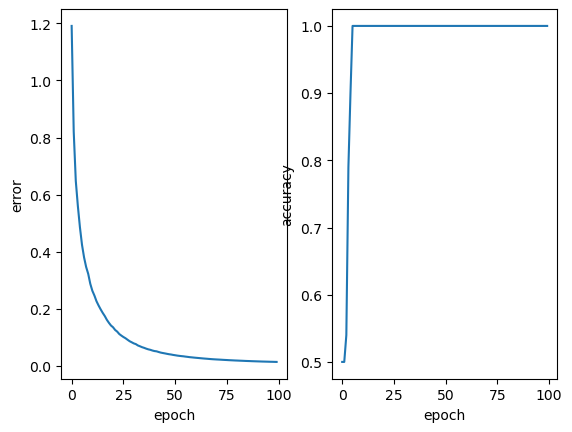

In [70]:
plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('error')

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

- 아이리스 모든 품종을 분류

In [71]:
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [72]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [76]:
# one-hot-encoding
y_onehot = np.eye(3)[y]
y_onehot.shape

(150, 3)

In [77]:
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [84]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # 확률값 3개를 모두 더해서 합이 1이 되도록 한다

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 10)                50        
                                                                 
 dense_39 (Dense)            (None, 10)                110       
                                                                 
 dense_40 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [86]:
model.fit(X, y_onehot, epochs=300)

Epoch 1/300
5/5 [==============================] - 0s 1ms/step - loss: 1.2139 - acc: 0.5800
Epoch 2/300
5/5 [==============================] - 0s 1ms/step - loss: 0.9567 - acc: 0.5533
Epoch 3/300
5/5 [==============================] - 0s 1ms/step - loss: 0.9134 - acc: 0.8667
Epoch 4/300
5/5 [==============================] - 0s 1ms/step - loss: 0.8892 - acc: 0.9400
Epoch 5/300
5/5 [==============================] - 0s 1ms/step - loss: 0.8666 - acc: 0.8533
Epoch 6/300
5/5 [==============================] - 0s 1ms/step - loss: 0.8499 - acc: 0.8733
Epoch 7/300
5/5 [==============================] - 0s 1ms/step - loss: 0.8277 - acc: 0.9200
Epoch 8/300
5/5 [==============================] - 0s 1ms/step - loss: 0.8059 - acc: 0.9067
Epoch 9/300
5/5 [==============================] - 0s 995us/step - loss: 0.7827 - acc: 0.9067
Epoch 10/300
5/5 [==============================] - 0s 1ms/step - loss: 0.7560 - acc: 0.9000
Epoch 11/300
5/5 [==============================] - 0s 1ms/step - loss: 0.732

5/5 [==============================] - 0s 997us/step - loss: 0.1962 - acc: 0.9733
Epoch 90/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1949 - acc: 0.9800
Epoch 91/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1909 - acc: 0.9733
Epoch 92/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1878 - acc: 0.9800
Epoch 93/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1886 - acc: 0.9600
Epoch 94/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1898 - acc: 0.9600
Epoch 95/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1950 - acc: 0.9600
Epoch 96/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1892 - acc: 0.9667
Epoch 97/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1808 - acc: 0.9800
Epoch 98/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1791 - acc: 0.9800
Epoch 99/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1798 - 

5/5 [==============================] - 0s 1ms/step - loss: 0.1207 - acc: 0.9533
Epoch 177/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1112 - acc: 0.9800
Epoch 178/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1133 - acc: 0.9733
Epoch 179/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1089 - acc: 0.9800
Epoch 180/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1178 - acc: 0.9667
Epoch 181/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1181 - acc: 0.9600
Epoch 182/300
5/5 [==============================] - 0s 997us/step - loss: 0.1064 - acc: 0.9733
Epoch 183/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1375 - acc: 0.9533
Epoch 184/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1078 - acc: 0.9667
Epoch 185/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1072 - acc: 0.9800
Epoch 186/300
5/5 [==============================] - 0s 1ms/step - loss:

5/5 [==============================] - 0s 1ms/step - loss: 0.0938 - acc: 0.9800
Epoch 263/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0913 - acc: 0.9667
Epoch 264/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0898 - acc: 0.9667
Epoch 265/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0929 - acc: 0.9800
Epoch 266/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1035 - acc: 0.9533
Epoch 267/300
5/5 [==============================] - 0s 980us/step - loss: 0.0917 - acc: 0.9667
Epoch 268/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0881 - acc: 0.9733
Epoch 269/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0898 - acc: 0.9733
Epoch 270/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0828 - acc: 0.9800
Epoch 271/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1076 - acc: 0.9333
Epoch 272/300
5/5 [==============================] - 0s 1ms/step - loss:

In [87]:
h = model.history.history # 학습이력

Text(0, 0.5, 'accuracy')

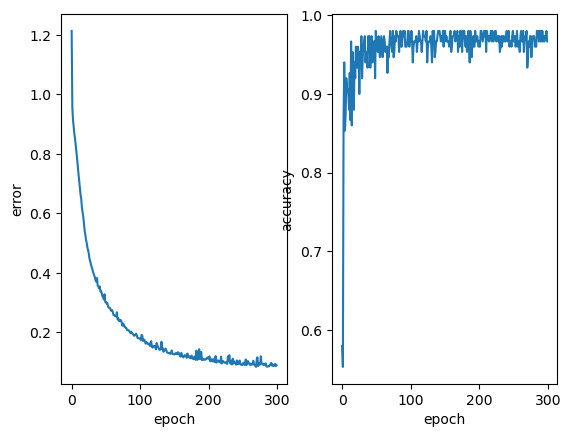

In [88]:
plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('error')

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

- Adam 경사하강법 적용

In [89]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # 확률값 3개를 모두 더해서 합이 1이 되도록 한다

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 10)                50        
                                                                 
 dense_42 (Dense)            (None, 10)                110       
                                                                 
 dense_43 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [91]:
model.fit(X, y_onehot, epochs=300)

Epoch 1/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0727 - acc: 0.4067
Epoch 2/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0561 - acc: 0.4067
Epoch 3/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0383 - acc: 0.4733
Epoch 4/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0214 - acc: 0.5267
Epoch 5/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0052 - acc: 0.5533
Epoch 6/300
5/5 [==============================] - 0s 1ms/step - loss: 0.9897 - acc: 0.5867
Epoch 7/300
5/5 [==============================] - 0s 1ms/step - loss: 0.9741 - acc: 0.5733
Epoch 8/300
5/5 [==============================] - 0s 2ms/step - loss: 0.9583 - acc: 0.5933
Epoch 9/300
5/5 [==============================] - 0s 1ms/step - loss: 0.9432 - acc: 0.6333
Epoch 10/300
5/5 [==============================] - 0s 2ms/step - loss: 0.9287 - acc: 0.7533
Epoch 11/300
5/5 [==============================] - 0s 1ms/step - loss: 0.9141 

5/5 [==============================] - 0s 1ms/step - loss: 0.3285 - acc: 0.9667
Epoch 90/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3247 - acc: 0.9733
Epoch 91/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3215 - acc: 0.9533
Epoch 92/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3186 - acc: 0.9533
Epoch 93/300
5/5 [==============================] - 0s 2ms/step - loss: 0.3151 - acc: 0.9533
Epoch 94/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3117 - acc: 0.9667
Epoch 95/300
5/5 [==============================] - 0s 2ms/step - loss: 0.3086 - acc: 0.9600
Epoch 96/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3063 - acc: 0.9533
Epoch 97/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3026 - acc: 0.9667
Epoch 98/300
5/5 [==============================] - 0s 1ms/step - loss: 0.3011 - acc: 0.9600
Epoch 99/300
5/5 [==============================] - 0s 1ms/step - loss: 0.2964 - ac

5/5 [==============================] - 0s 1ms/step - loss: 0.1441 - acc: 0.9733
Epoch 177/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1430 - acc: 0.9733
Epoch 178/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1424 - acc: 0.9733
Epoch 179/300
5/5 [==============================] - 0s 997us/step - loss: 0.1418 - acc: 0.9733
Epoch 180/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1400 - acc: 0.9733
Epoch 181/300
5/5 [==============================] - 0s 997us/step - loss: 0.1393 - acc: 0.9733
Epoch 182/300
5/5 [==============================] - 0s 1ms/step - loss: 0.1382 - acc: 0.9733
Epoch 183/300
5/5 [==============================] - 0s 997us/step - loss: 0.1379 - acc: 0.9733
Epoch 184/300
5/5 [==============================] - 0s 997us/step - loss: 0.1375 - acc: 0.9733
Epoch 185/300
5/5 [==============================] - 0s 997us/step - loss: 0.1356 - acc: 0.9733
Epoch 186/300
5/5 [==============================] - 0s 997us/st

5/5 [==============================] - 0s 1ms/step - loss: 0.0954 - acc: 0.9733
Epoch 263/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0960 - acc: 0.9733
Epoch 264/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0958 - acc: 0.9733
Epoch 265/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0940 - acc: 0.9733
Epoch 266/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0952 - acc: 0.9733
Epoch 267/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0950 - acc: 0.9800
Epoch 268/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0936 - acc: 0.9733
Epoch 269/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0932 - acc: 0.9733
Epoch 270/300
5/5 [==============================] - 0s 1ms/step - loss: 0.0936 - acc: 0.9733
Epoch 271/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0926 - acc: 0.9733
Epoch 272/300
5/5 [==============================] - 0s 1ms/step - loss: 0

In [92]:
h = model.history.history # 학습이력

Text(0, 0.5, 'accuracy')

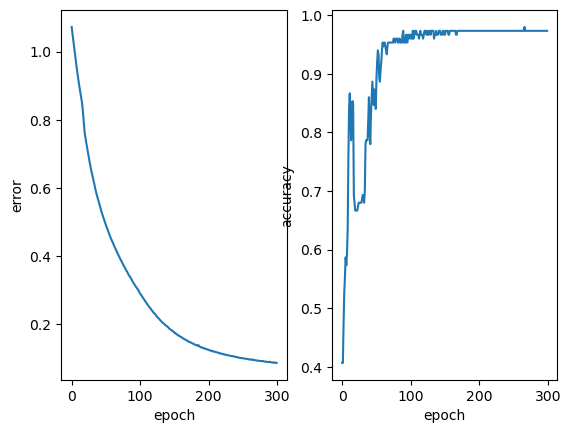

In [93]:
plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('error')

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [94]:
y_hat = model.predict(X)
y_hat

5/5 [==============================] - 0s 999us/step


array([[9.93913591e-01, 6.08635088e-03, 2.36757813e-09],
       [9.91795838e-01, 8.20418168e-03, 9.54401091e-09],
       [9.91408288e-01, 8.59164819e-03, 9.50605994e-09],
       [9.90541518e-01, 9.45845339e-03, 1.41952370e-08],
       [9.93769705e-01, 6.23027282e-03, 2.36496556e-09],
       [9.95457768e-01, 4.54219012e-03, 9.69018421e-10],
       [9.91390824e-01, 8.60916451e-03, 9.97972016e-09],
       [9.93301153e-01, 6.69880025e-03, 3.53044660e-09],
       [9.88567948e-01, 1.14320507e-02, 3.13820010e-08],
       [9.92193043e-01, 7.80696049e-03, 6.11416828e-09],
       [9.95259583e-01, 4.74046869e-03, 8.77329986e-10],
       [9.92453516e-01, 7.54653802e-03, 5.25818722e-09],
       [9.91417348e-01, 8.58262088e-03, 9.08523479e-09],
       [9.88480091e-01, 1.15199098e-02, 2.43492870e-08],
       [9.96652305e-01, 3.34773539e-03, 2.16801868e-10],
       [9.96831357e-01, 3.16866045e-03, 1.96244160e-10],
       [9.95466709e-01, 4.53322520e-03, 9.62548485e-10],
       [9.93826568e-01, 6.17336